<a href="https://colab.research.google.com/github/Lu1sV1rus/EDP/blob/main/M%C3%A9todo_de_M%C3%ADnimos_Cuadr%C3%A1dos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size=5>Método de Mínimos Cuadrádos

---



<font size=3> Importamos las librerias a utilizar

In [1]:
import sympy as sp                      # Para las soluciones, variables, ecuaciones
import numpy as np                      # Para los arrays (vectores) y graficas
import matplotlib.pyplot as plt         # Para las graficas
from tabulate import tabulate           # Para las tablas (presentar los errores)

<font size=3> Definimos las variables <font color=purple>$x,a,b$

In [2]:
x, a, b = sp.symbols("x, a, b")         # Variables
u = sp.Function("u")                    # Funcion

<font size=3> Escribimos la ecuación a resolver <font color=purple>$u''(x)+u(x)-x$

In [3]:
ecu = u(x).diff(x, 2) + u(x) - x        # Ecuacion
ecu

-x + u(x) + Derivative(u(x), (x, 2))

<font size=3> Resolvemos la ecuación con sympy, agregando las restricciones <font color=purple>$u(0)=0$ </font><font size=3> y <font color=purple>$u'(0)=0$

---

<font size=2 color=purple>sp.dsolve(eq, func, hint='default', **kwargs)

<font size=2 color=purple>sp.dsolve

Nos permite encontrar la solución analítica de la ecuacion $ecu$

<font size=2 color=purple>eq

La ecuación diferencial

<font size=2 color=purple>func

La función desconocida

<font size=2 color=purple>hint

Indica el método de resolución que debe intentar SymPy (ej. 'separable', 'linear', '1st_linear')

<font size=2 color=purple>ics={}

Le indica a dsolve que debe usar las condiciones iniciales proporcionadas

In [4]:
sol = sp.dsolve(ecu, ics={u(0):0, sp.diff(u(x), x).subs(x, 0):2})     # Solucionamos la ecuacion con las restricciones
sol

Eq(u(x), x + sin(x))

<font size=3> Creamos una funcion que nos regrese el valor exacto

---

<font size=2 color=purple>sp.lambdify

Nos permite crear vectores para evaluar el vector $X$

<font size=2 color=purple>sp.simplify

Reduce los valores a su forma mas simple, nos ayuda a que sea un numero (float), en lugar de una expresion (ej, 0.04+sin(10))

<font size=2 color=purple>sol.rhs

Nos da el valor de la sol



In [5]:
valorex = sp.lambdify(x, sp.simplify(sol.rhs), "numpy")   # Creamos un metodo que nos regresa los valores exactos (reales)

<font size=3> Graficamos

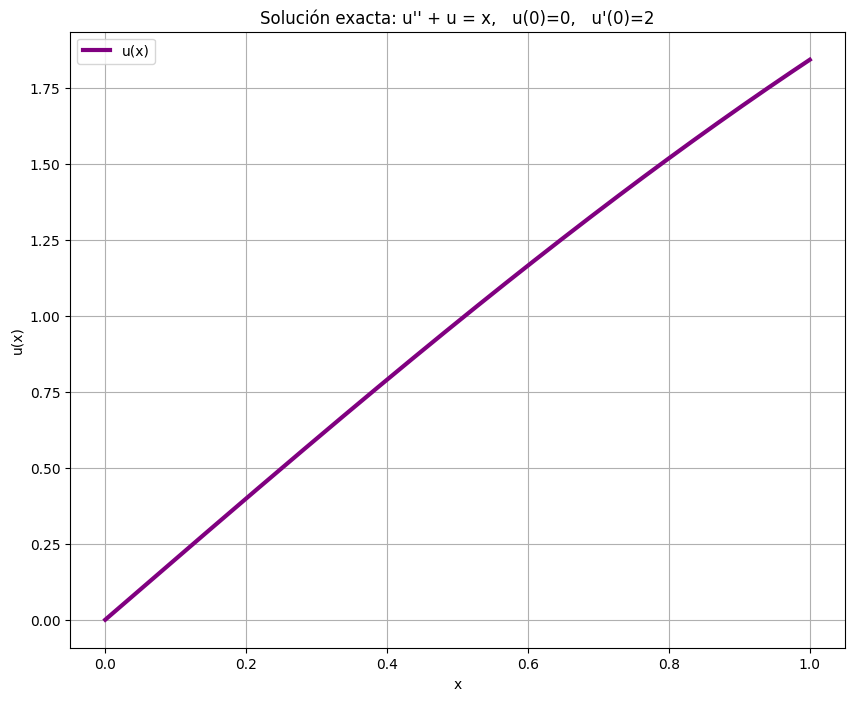

In [41]:
xx = np.linspace(0, 1, 200)                        # Valores en X
yy = valorex(xx)                                     # Valores en Y
plt.figure(figsize=(10,8))                           # Cramos un plano de 10x8
plt.plot(xx, yy, label="u(x)", linewidth=3, color="purple")     # Linea
plt.title("Solución exacta: u'' + u = x,   u(0)=0,   u'(0)=2")  # Titulo
plt.xlabel("x")                                      # Etiqueta en X
plt.ylabel("u(x)")                                   # Etiqueta en Y
plt.grid()                                           # Cuadricula
plt.legend()                                         # Etiquetas
plt.show()

<font size=3> Escribimos la ecuacion $u_N$ = $2x+ax^2+bx^3$

In [8]:
un = 2*x + a*x**2 + b*x**3              # Guardamos la ecuacion en un
un

a*x**2 + b*x**3 + 2*x

<font size=3> Calculamos la ecuacion $u_N''$ = $2a+6bx$

In [9]:
un2 = sp.simplify(sp.diff(un, x, 2))    # Guardamos la segunda derivada en un2, usamos simplify para reducir terminos
un2

2*a + 6*b*x

<font size=3> Definimos la ecuacion $e$ = $u_N''+u_N-x$

In [10]:
e = sp.simplify(un2 + un - x)           # Guardamos la ecuacion en e, usamos simplify para reducir terminos
e

a*x**2 + 2*a + b*x**3 + 6*b*x + x

<font size=3> Calculamos $e^2$

In [27]:
e2=sp.simplify(e**2)                    # Guardamos el cuadrado de e, usamos simplify para reducir terminos
e2

(a*x**2 + 2*a + b*x**3 + 6*b*x + x)**2

<font size=3> Calculamos ∫$e^{2}$

In [28]:
e22=sp.integrate(e2,(x,0,1))            # Guardamos la integral de e^2, usamos simplify para reducir terminos
e22=sp.simplify(e22)
e22

83*a**2/15 + 49*a*b/3 + 5*a/2 + 509*b**2/35 + 22*b/5 + 1/3

<font size=3> Calculamos las parciales $∂a$ y $∂b$

In [29]:
pa = sp.diff(e22, a)                     # Calculamos la parcial de a
pb = sp.diff(e22, b)                     # Calculamos la parcial de b

<font size=3> Resolvemos la ecuación con sympy, agregando las restricciones <font color=purple>$u(0)=0$ </font><font size=3> y <font color=purple>$u'(0)=0$

---

<font size=2 color=purple>sp.dsolve(eq, func, hint='default', **kwargs)

<font size=2 color=purple>sp.dsolve

Nos permite encontrar la solución analítica de la ecuacion $ecu$

<font size=2 color=purple>eq

La ecuación diferencial

<font size=2 color=purple>func

La función desconocida

<font size=2 color=purple>hint

Indica el método de resolución que debe intentar SymPy (ej. 'separable', 'linear', '1st_linear')

<font size=2 color=purple>ics={}

Le indica a dsolve que debe usar las condiciones iniciales proporcionadas

In [31]:
sol2 = sp.solve([pa, pb], [a, b])
sol2

{a: -1335/86789, b: -24759/173578}

<font size=3> Creamos una funcion que nos regrese el valor esperado de la funcion

---

<font size=2 color=purple>sp.lambdify

Nos permite crear vectores para evaluar el vector $X$

<font size=2 color=purple>un.subs()

Sustituye los valores en un, por los que se obtiene de la $sol2$

<font size=2 color=purple>sol2

Que contiene la solucion con los puntos de colocacion ($points$=$0.5,1$)

In [32]:
valores = sp.lambdify(x, un.subs(sol2) , "numpy")    # Creamos un metodo que nos regresa los valores esperados (calculados con el metodo)

<font size=3> Graficamos

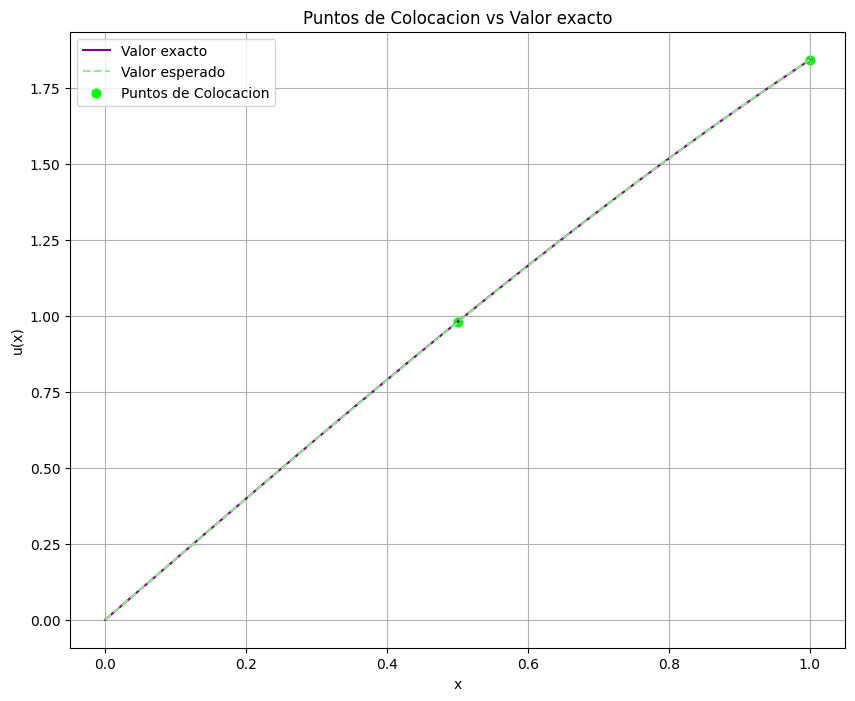

In [44]:
xx = np.linspace(0, 1, 200)                        # Valores en X
y2 = valores(xx)                                     # Valores en Y2 (esperados)
plt.figure(figsize=(10,8))                           # Cramos un plano de 10x8
plt.plot(xx, yy, label="Valor exacto", color="purple")            # Linea exactos
plt.plot(xx, y2,"--", label="Valor esperado", color="lightgreen")      # Linea esperados
plt.scatter([0.5, 1.0], valores(np.array([0.5, 1.0])), color="lime", s=40, label="Puntos de Colocacion") # Puntos de Colocacion
plt.title("Mínimos Cuadrádos vs Valor exacto")    # Titulo
plt.xlabel("x")                                      # Etiqueta en X
plt.ylabel("u(x)")                                   # Etiqueta en Y
plt.grid()                                           # Cuadricula
plt.legend()                                         # Etiquetas
plt.show()                                           # Mostrar

In [45]:
points = [0, 1]         # Creamos un vector con los valores de los puntos de colocacion
ecu3 = [sp.Eq(e.subs(x, p), 0) for p in points]    # Planteamos la ecuacion 2
sol3 = sp.solve(ecu3, [a, b])                      # Resolvemos la ecuacion 2
valores2 = sp.lambdify(x, un.subs(sol3) , "numpy")    # Creamos un metodo que nos regresa los valores esperados (calculados con el metodo)

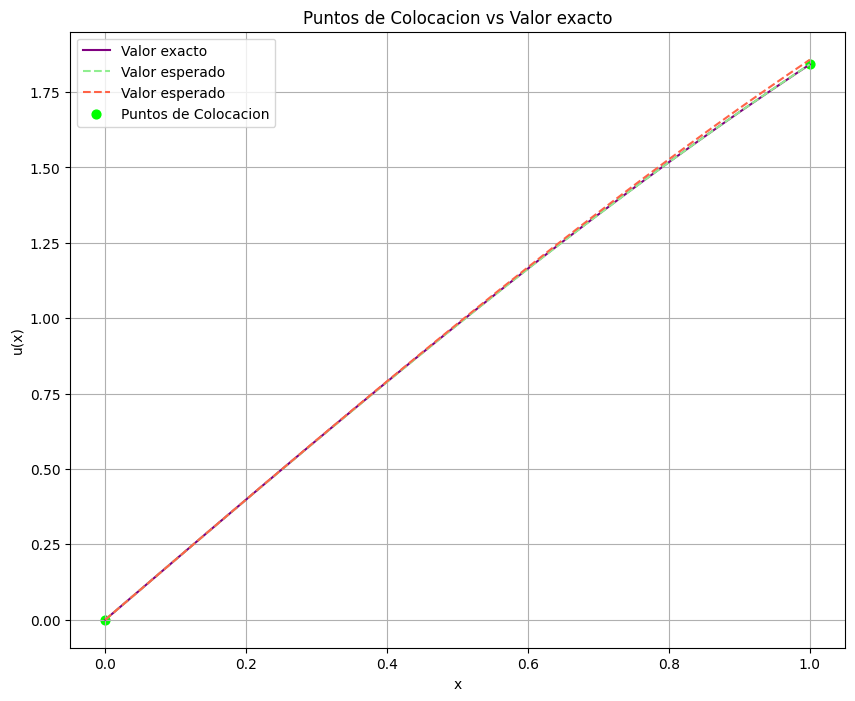

In [50]:
xx = np.linspace(0, 1, 200)                        # Valores en X
y3 = valores2(xx)                                     # Valores en Y2 (esperados)
plt.figure(figsize=(10,8))                           # Cramos un plano de 10x8
plt.plot(xx, yy, label="Valor exacto", color="purple")            # Linea exactos
plt.plot(xx, y2,"--", label="Valor esperado", color="lightgreen")      # Linea esperados
plt.plot(xx, y3,"--", label="Valor esperado", color="tomato")      # Linea esperados
plt.scatter([0, 1.0], valores(np.array([0, 1.0])), color="lime", s=40, label="Puntos de Colocacion") # Puntos de Colocacion
plt.title("Puntos de Colocacion vs Valor exacto")    # Titulo
plt.xlabel("x")                                      # Etiqueta en X
plt.ylabel("u(x)")                                   # Etiqueta en Y
plt.grid()                                           # Cuadricula
plt.legend()                                         # Etiquetas
plt.show()                                           # Mostrar